## Multi feature predictions

In [1]:
### importing the libraries
import pandas as pd
import numpy as np

In [2]:
### setting up the system path
import sys
sys.path.append('../')

In [3]:
### importing the functions from the src
from src.graphs.graphs_metrices import metrices, plot_predictions, plot_graphs_post_scaling

In [4]:
### loading the data
df = pd.read_csv('../stocks/apple-18-2.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,129.87,130.7100,128.80,130.24,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,126.00,129.7200,125.60,128.01,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,125.86,126.7100,118.39,123.76,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,125.35,125.5600,122.23,124.94,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,120.99,126.4585,120.54,124.68,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [5]:
### creating the df_copy (for the comparison post scaling)
df_copy = df.copy()
df_copy.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,129.87,130.7100,128.80,130.24,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,126.00,129.7200,125.60,128.01,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,125.86,126.7100,118.39,123.76,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,125.35,125.5600,122.23,124.94,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,120.99,126.4585,120.54,124.68,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [6]:
### taking the features ['close', 'high', 'low', 'open', 'volume']
features_to_target = ['close', 'high', 'low', 'open', 'volume']
features_to_target

['close', 'high', 'low', 'open', 'volume']

In [7]:
### scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df[features_to_target] = scaler.fit_transform(df[features_to_target])
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,0.079550,0.061271,0.075349,0.067057,0.231933,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,0.056763,0.055386,0.056197,0.053718,0.282530,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,0.055938,0.037493,0.013047,0.028295,0.466678,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,0.052935,0.030656,0.036028,0.035353,0.309637,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,0.027263,0.035998,0.025914,0.033798,0.421773,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


feature : close


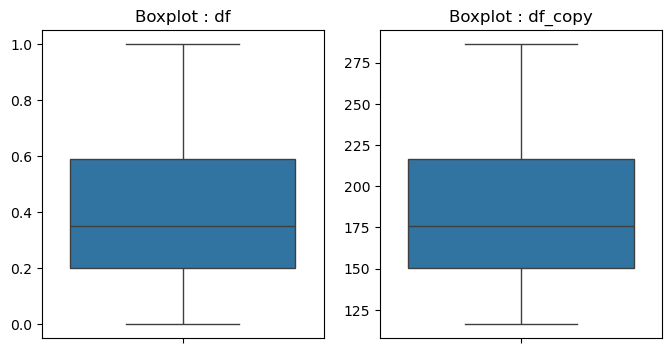

feature : high


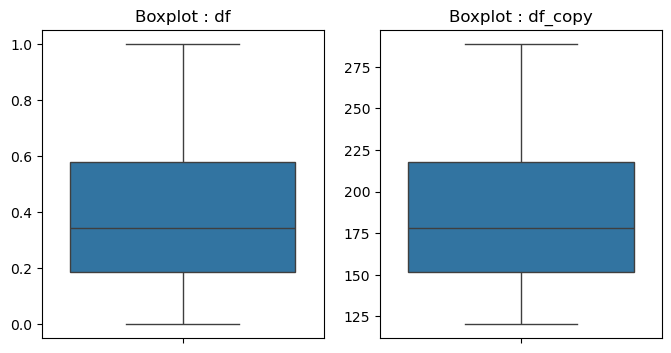

feature : low


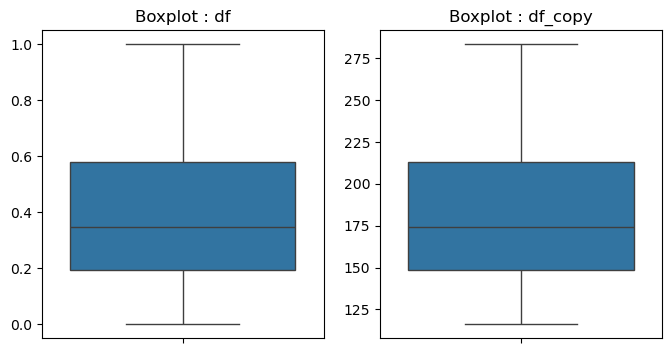

feature : open


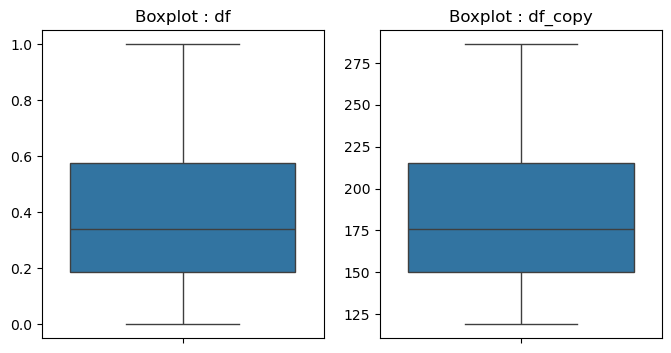

feature : volume


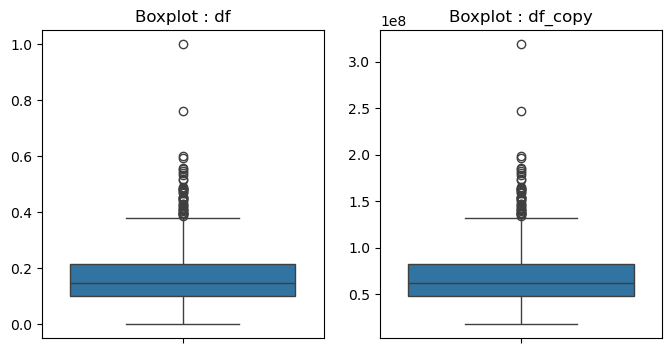

In [8]:
### plotting the graphs pre and post scaling
plot_graphs_post_scaling(df, df_copy, cols = features_to_target)

In [9]:
### making the sequences (we will be targeting the period of 90 days, and our feature is 'close')
X, y = [], []
days = 90
for i in range(len(df) - days) : 
    X.append(df[features_to_target][i : i + days])
    y.append(df[features_to_target[0]][i + days])

X = np.array(X)
y = np.array(y)

In [10]:
### checking the X
X

array([[[0.07955014, 0.06127149, 0.07534861, 0.06705749, 0.23193277],
        [0.05676264, 0.05538623, 0.05619726, 0.05371777, 0.28252998],
        [0.05593829, 0.03749267, 0.01304686, 0.02829455, 0.46667809],
        ...,
        [0.10039451, 0.08463418, 0.10006583, 0.09224143, 0.16890162],
        [0.09862804, 0.08017565, 0.09934766, 0.08631932, 0.17579311],
        [0.1084614 , 0.08823073, 0.10257945, 0.08602022, 0.1469589 ]],

       [[0.05676264, 0.05538623, 0.05619726, 0.05371777, 0.28252998],
        [0.05593829, 0.03749267, 0.01304686, 0.02829455, 0.46667809],
        [0.05293529, 0.03065625, 0.03602849, 0.03535323, 0.30963707],
        ...,
        [0.09862804, 0.08017565, 0.09934766, 0.08631932, 0.17579311],
        [0.1084614 , 0.08823073, 0.10257945, 0.08602022, 0.1469589 ],
        [0.11758818, 0.09563189, 0.10856425, 0.09433511, 0.15508732]],

       [[0.05593829, 0.03749267, 0.01304686, 0.02829455, 0.46667809],
        [0.05293529, 0.03065625, 0.03602849, 0.03535323, 0.3

In [11]:
### checking the y
y

array([0.11758818, 0.12129777, 0.12312312, ..., 0.82093859, 0.86863334,
       0.87140081])

In [12]:
### veryfying the y, by checking the 91st to 93rd element of the 'close' in the 'df'
df['close'].iloc[90 : 94]

90    0.117588
91    0.121298
92    0.123123
93    0.138962
Name: close, dtype: float64

In [13]:
### checking the shape of the X and y
print(f"{X.shape} :: {y.shape}")

(1165, 90, 5) :: (1165,)


In [14]:
### reshaping the y
y = y.reshape(-1, 1)
y.shape

(1165, 1)

In [15]:
### creating the train and the test sequences (test size  = 80%)
test_size = int(len(df) * 0.80)
X_train, X_test = X[ : test_size], X[test_size : ]
y_train, y_test = y[: test_size], y[test_size : ]

In [16]:
### checking the shape of the train and test data
print(f"{X_train.shape} :: {y_train.shape} \n{X_test.shape} :: {y_test.shape}")

(1004, 90, 5) :: (1004, 1) 
(161, 90, 5) :: (161, 1)


In [17]:
### importing the libraries to create the model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional

In [18]:
### creating the model
model = Sequential([
    LSTM(50, return_sequences = True, input_shape = (days, 5)),
    Dropout(0.33),
    Bidirectional(LSTM(100)),
    Dropout(0.33),
    Dense(1, activation = 'linear')
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

c:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
### checking the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 90, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200)            │       120,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,201 (516.41 KB)

 Trainable params: 132,201 (516.41 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
### training the model
model.fit(X_train, y_train, epochs = 30, batch_size = 32, verbose = 1)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0338 - mse: 0.0338
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0039 - mse: 0.0039
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0035 - mse: 0.0035
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0032 - mse: 0.0032
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0032 - mse: 0.0032
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0030 - mse: 0.0030
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0029 - mse: 0.0029
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0026 - mse: 0.0026
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0025 - mse: 0.0025
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0024 - mse: 0.0024
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0024 - mse: 0.0024
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0027 - mse: 0.0027
Epoch 13/30
32/32 ━━━━━━━━━━━━━━━━━━━

In [21]:
### y_pred 
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


array([[0.4933833 ],
       [0.4944126 ],
       [0.50089973],
       [0.51238245],
       [0.52785975],
       [0.5382893 ],
       [0.5438372 ],
       [0.545428  ],
       [0.5475354 ],
       [0.5484253 ],
       [0.5465778 ],
       [0.54442775],
       [0.5422139 ],
       [0.5401421 ],
       [0.5397175 ],
       [0.5419818 ],
       [0.5460108 ],
       [0.5505549 ],
       [0.5544952 ],
       [0.5578097 ],
       [0.5599655 ],
       [0.55842304],
       [0.5535457 ],
       [0.5447833 ],
       [0.5320986 ],
       [0.5209356 ],
       [0.5137138 ],
       [0.5121197 ],
       [0.5247845 ],
       [0.5457541 ],
       [0.57104355],
       [0.59401524],
       [0.6151877 ],
       [0.63286245],
       [0.64390767],
       [0.6510148 ],
       [0.6535795 ],
       [0.6500123 ],
       [0.64244896],
       [0.6363518 ],
       [0.6326303 ],
       [0.6296853 ],
       [0.63191205],
       [0.6371871 ],
       [0.64311504],
       [0.64425856],
       [0.6511623 ],
       [0.661

In [22]:
### dummies for y_pred
dummies_for_pred = np.zeros(shape = (len(y_pred), 5))
dummies_for_pred[:, 0] = y_pred.flatten()
dummies_for_pred

array([[0.49338329, 0.        , 0.        , 0.        , 0.        ],
       [0.4944126 , 0.        , 0.        , 0.        , 0.        ],
       [0.50089973, 0.        , 0.        , 0.        , 0.        ],
       [0.51238245, 0.        , 0.        , 0.        , 0.        ],
       [0.52785975, 0.        , 0.        , 0.        , 0.        ],
       [0.53828931, 0.        , 0.        , 0.        , 0.        ],
       [0.54383719, 0.        , 0.        , 0.        , 0.        ],
       [0.54542798, 0.        , 0.        , 0.        , 0.        ],
       [0.54753542, 0.        , 0.        , 0.        , 0.        ],
       [0.54842532, 0.        , 0.        , 0.        , 0.        ],
       [0.54657781, 0.        , 0.        , 0.        , 0.        ],
       [0.54442775, 0.        , 0.        , 0.        , 0.        ],
       [0.54221392, 0.        , 0.        , 0.        , 0.        ],
       [0.54014212, 0.        , 0.        , 0.        , 0.        ],
       [0.5397175 , 0.        , 0.

In [23]:
### dummies for y_test
dummies_for_test = np.zeros(shape = (len(y_test), 5))
dummies_for_test[:, 0] = y_test.flatten()
dummies_for_test

array([[0.5229347 , 0.        , 0.        , 0.        , 0.        ],
       [0.53853854, 0.        , 0.        , 0.        , 0.        ],
       [0.56574221, 0.        , 0.        , 0.        , 0.        ],
       [0.57227816, 0.        , 0.        , 0.        , 0.        ],
       [0.55108049, 0.        , 0.        , 0.        , 0.        ],
       [0.55143379, 0.        , 0.        , 0.        , 0.        ],
       [0.5580875 , 0.        , 0.        , 0.        , 0.        ],
       [0.56556557, 0.        , 0.        , 0.        , 0.        ],
       [0.55820526, 0.        , 0.        , 0.        , 0.        ],
       [0.54324913, 0.        , 0.        , 0.        , 0.        ],
       [0.54613437, 0.        , 0.        , 0.        , 0.        ],
       [0.55231702, 0.        , 0.        , 0.        , 0.        ],
       [0.55149267, 0.        , 0.        , 0.        , 0.        ],
       [0.55832303, 0.        , 0.        , 0.        , 0.        ],
       [0.56597774, 0.        , 0.

In [24]:
### inverse scaling the dummies and then updating the y_pred and y_test
dummies_for_test = scaler.inverse_transform(dummies_for_test)
dummies_for_pred = scaler.inverse_transform(dummies_for_pred)

In [25]:
### checking the dummies_for_test
dummies_for_test

array([[2.0517000e+02, 1.2040310e+02, 1.1621000e+02, 1.1903000e+02,
        1.7910574e+07],
       [2.0782000e+02, 1.2040310e+02, 1.1621000e+02, 1.1903000e+02,
        1.7910574e+07],
       [2.1244000e+02, 1.2040310e+02, 1.1621000e+02, 1.1903000e+02,
        1.7910574e+07],
       [2.1355000e+02, 1.2040310e+02, 1.1621000e+02, 1.1903000e+02,
        1.7910574e+07],
       [2.0995000e+02, 1.2040310e+02, 1.1621000e+02, 1.1903000e+02,
        1.7910574e+07],
       [2.1001000e+02, 1.2040310e+02, 1.1621000e+02, 1.1903000e+02,
        1.7910574e+07],
       [2.1114000e+02, 1.2040310e+02, 1.1621000e+02, 1.1903000e+02,
        1.7910574e+07],
       [2.1241000e+02, 1.2040310e+02, 1.1621000e+02, 1.1903000e+02,
        1.7910574e+07],
       [2.1116000e+02, 1.2040310e+02, 1.1621000e+02, 1.1903000e+02,
        1.7910574e+07],
       [2.0862000e+02, 1.2040310e+02, 1.1621000e+02, 1.1903000e+02,
        1.7910574e+07],
       [2.0911000e+02, 1.2040310e+02, 1.1621000e+02, 1.1903000e+02,
        1.79

In [26]:
### dummies_for_pred
dummies_for_pred

array([[2.00151284e+02, 1.20403100e+02, 1.16210000e+02, 1.19030000e+02,
        1.79105740e+07],
       [2.00326092e+02, 1.20403100e+02, 1.16210000e+02, 1.19030000e+02,
        1.79105740e+07],
       [2.01427802e+02, 1.20403100e+02, 1.16210000e+02, 1.19030000e+02,
        1.79105740e+07],
       [2.03377911e+02, 1.20403100e+02, 1.16210000e+02, 1.19030000e+02,
        1.79105740e+07],
       [2.06006421e+02, 1.20403100e+02, 1.16210000e+02, 1.19030000e+02,
        1.79105740e+07],
       [2.07777673e+02, 1.20403100e+02, 1.16210000e+02, 1.19030000e+02,
        1.79105740e+07],
       [2.08719870e+02, 1.20403100e+02, 1.16210000e+02, 1.19030000e+02,
        1.79105740e+07],
       [2.08990034e+02, 1.20403100e+02, 1.16210000e+02, 1.19030000e+02,
        1.79105740e+07],
       [2.09347940e+02, 1.20403100e+02, 1.16210000e+02, 1.19030000e+02,
        1.79105740e+07],
       [2.09499072e+02, 1.20403100e+02, 1.16210000e+02, 1.19030000e+02,
        1.79105740e+07],
       [2.09185310e+02, 1.2040

In [27]:
### restoring the values in y_pred
y_pred[:, 0] = dummies_for_pred[:, 0]
y_pred

array([[200.15129],
       [200.3261 ],
       [201.4278 ],
       [203.37791],
       [206.00642],
       [207.77768],
       [208.71986],
       [208.99004],
       [209.34795],
       [209.49907],
       [209.1853 ],
       [208.82016],
       [208.44418],
       [208.09233],
       [208.02022],
       [208.40477],
       [209.08902],
       [209.86073],
       [210.52992],
       [211.09282],
       [211.45894],
       [211.19699],
       [210.36867],
       [208.88055],
       [206.7263 ],
       [204.83049],
       [203.604  ],
       [203.3333 ],
       [205.48415],
       [209.04541],
       [213.34033],
       [217.24161],
       [220.83733],
       [223.83904],
       [225.71484],
       [226.92184],
       [227.3574 ],
       [226.75159],
       [225.4671 ],
       [224.43163],
       [223.7996 ],
       [223.29945],
       [223.67763],
       [224.57349],
       [225.58023],
       [225.77443],
       [226.9469 ],
       [228.76503],
       [230.5472 ],
       [231.67383],


In [28]:
### restoring the values in y_test
y_test[:, 0] = dummies_for_test[:, 0]
y_test

array([[205.17],
       [207.82],
       [212.44],
       [213.55],
       [209.95],
       [210.01],
       [211.14],
       [212.41],
       [211.16],
       [208.62],
       [209.11],
       [210.16],
       [210.02],
       [211.18],
       [212.48],
       [214.4 ],
       [214.15],
       [213.76],
       [213.88],
       [214.05],
       [211.27],
       [209.05],
       [207.57],
       [202.38],
       [203.35],
       [202.92],
       [213.25],
       [220.03],
       [229.35],
       [227.18],
       [229.65],
       [233.33],
       [232.78],
       [231.59],
       [230.89],
       [230.56],
       [226.01],
       [224.9 ],
       [227.76],
       [227.16],
       [229.31],
       [230.49],
       [232.56],
       [232.14],
       [229.72],
       [238.47],
       [239.78],
       [239.69],
       [237.88],
       [234.35],
       [226.79],
       [230.03],
       [234.07],
       [236.7 ],
       [238.15],
       [238.99],
       [237.88],
       [245.5 ],
       [256.08

MAE : 8.445573885899893
MSE : 99.03233423810069
RMSE : 9.95149909501582


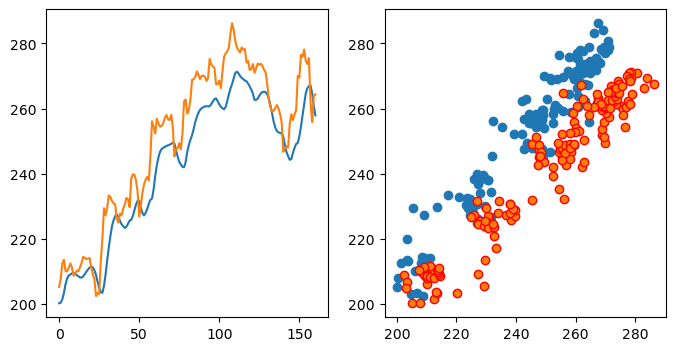

In [29]:
### plotting the metrices and graphs
metrices(y_test, y_pred)
plot_predictions(y_test, y_pred)

In [37]:
### predicting the future prices 'close' feature
### gettng the last sequence
window_size = 90
last_sequence = df[features_to_target][-window_size : ]
last_sequence

,close,high,low,open,volume
1165,0.810693,0.817973,0.819498,0.830143,0.067864
1166,0.759053,0.808343,0.764797,0.813005,0.146586
1167,0.773126,0.768573,0.774134,0.779745,0.067269
1168,0.773774,0.763549,0.768987,0.763115,0.058408
1169,0.783018,0.781235,0.785565,0.780373,0.053141
...,...,...,...,...,...
1250,0.937055,0.949827,0.947035,0.931178,0.113112
1251,0.855974,0.923313,0.861631,0.936532,0.210017
1252,0.820939,0.843119,0.833323,0.855297,0.127606
1253,0.868633,0.867255,0.833862,0.831609,0.134849


In [40]:
### checking out the shape
last_sequence.shape

(90, 5)

In [42]:
### reshaping the last_sequence
last_sequence = np.array(last_sequence).reshape(1, window_size, 5)
last_sequence.shape

(1, 90, 5)

In [45]:
### using the sliding window concept for the prediction of the future days
# future_days = 150
# future_pred = []
# current_window = last_sequence.copy()

# for _ in range(future_days) : 

#     next_predict = model.predict(current_window)
#     future_pred.append(next_predict[0, 0])

#     next_predict_reshaped = next_predict.reshape(1, 1, 1)

#     current_window = np.concatenate(
#         (current_window[:, 1:, :], next_predict_reshaped), axis = 1
#     )